In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [4]:
session_keys = experiment.Session.fetch('KEY')

In [5]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

In [ ]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [ ]:
photostims = experiment.Photostim * experiment.BrainLocation

In [ ]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking with spiking overlay

In [ ]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [ ]:
unit_key = units[6]

In [ ]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=7)

# Plot single-trial jaw movement

In [ ]:
tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent

In [ ]:
trials = (tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent).fetch('KEY')

In [ ]:
trial_key = trials[5]

In [ ]:
behavior_plot.plot_trial_jaw_movement(trial_key);

# Plot phase distribution of jaw movement

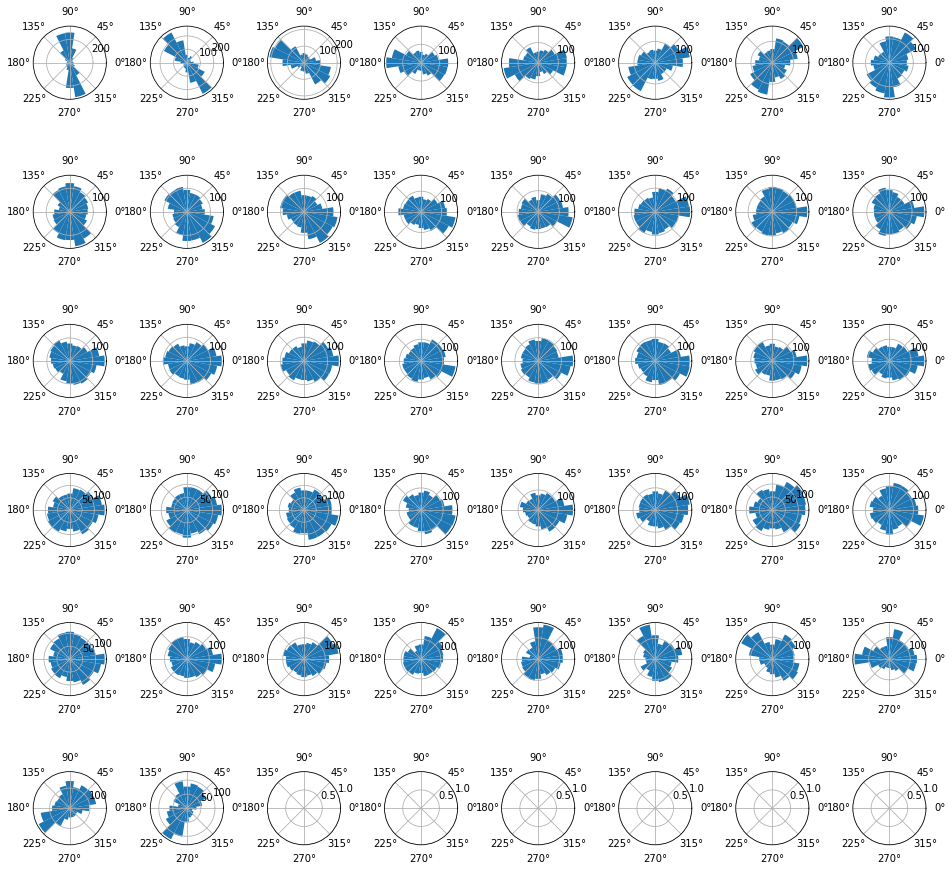

In [24]:
behavior_plot.plot_windowed_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), w_size=0.01, bin_counts=20)

======================================================================================

In [23]:
import importlib
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>